Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
%matplotlib inline

In [ ]:
# Creating sample for pareto distribution
pareto = sts.pareto(7, loc = 0, scale = 10.0)
sample = pareto.rvs(1000)

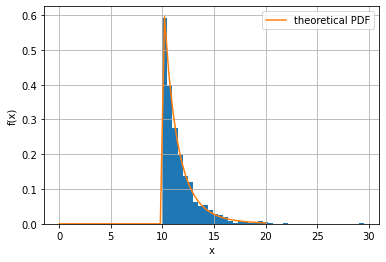

In [ ]:
# Building histogram
plt.hist(sample, bins = 40, density = True)


# Building theoretical PDF 
x = np.linspace(0, 20)
pdf = pareto.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='upper right')
plt.grid()

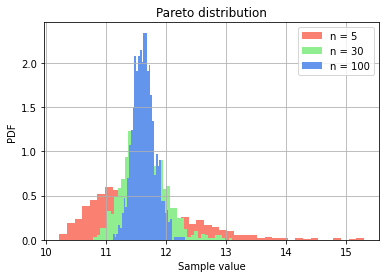

In [ ]:
# Building 1000 new samples of mean for n = 5, 30 and 100 

n = [5, 30, 100]
colors = ['salmon', 'lightgreen', 'cornflowerblue']

for i in n:
  mean_set = np.zeros(1000) 
  for j in range(1000):
      random_items_sample = np.random.choice(sample, i) 
      mean = np.mean(random_items_sample) 
      mean_set[j] =  mean 

  # Building histograms    
  plt.hist(mean_set, bins = 40, density = True, color = colors[n.index(i)], label = 'n = ' + str(i))
  plt.title('Pareto distribution')
  plt.ylabel('PDF')
  plt.xlabel('Sample value')
  plt.legend()
  plt.grid()

Среднее  распределения Парето: $\frac{k*xm}{k - 1}$, при k > 1

Дисперсия: $(\frac{xm}{k-1})^2\frac{k}{k - 2}$, при k > 2


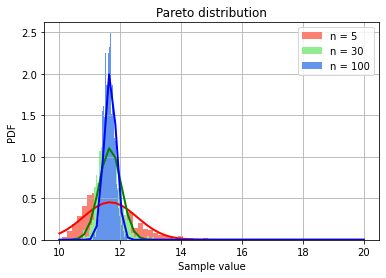

In [ ]:
# Building the same histograms

k, xm = 7, 10 # Pareto distribution parameters
colors = ['salmon', 'lightgreen', 'cornflowerblue']
colors_for_lines = ['red', 'green', 'blue']

for i in n:
  mean_set = np.zeros(1000) 
  for j in range(1000):
      random_items_sample = np.random.choice(sample, i) 
      mean = np.mean(random_items_sample)
      mean_set[j] =  mean 
  plt.hist(mean_set, bins = 40, density = True, color = colors[n.index(i)], label = 'n = ' + str(i))
  plt.title('Pareto distribution')
  plt.ylabel('PDF')
  plt.xlabel('Sample value')
  plt.legend()
  plt.grid()
  
  # Calculating parameters for normal distribution  
  norm_distribution = sts.norm(loc=k*xm/(k-1), scale= np.sqrt( (((xm/ (k-1) )**2)*(k/ (k-2) )) /i )  )
  pdf = norm_distribution.pdf(x)
  x = np.linspace(10, 20)
  # Printing the plots for normal distribution
  plt.plot(x, pdf, color=colors_for_lines[n.index(i)], linewidth=2)


Вывод: при увеличении объема выборки точность аппроксимации выборки выборочных средних исходного распределения нормальным распределением увеличивается.